In [1]:
# Mengekstrak Data Set
# 1. Upload File DataSet.zip ke Direktori
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/Projek Pola/catur.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
print('Done')

Done


00000199.jpg
00000019.jpg
00000008.jpg
00000120.jpg
00000145.jpg
00000081.jpg
00000174.jpg
00000070.jpg
00000095.gif
00000028.jpg
00000074.jpg
00000115.jpg
00000151.png
00000121.jpg
00000054.jpeg
00000003.png
00000114.jpg
00000149.jpg
00000138.jpg
00000044.png
00000158.jpg
00000127.jpg
00000102.jpg
00000189.jpg
00000129.jpg
00000071.png
00000136.png
00000078.jpg
00000026.jpg
00000010.jpg
00000094.jpg
00000025.jpg
00000000.JPG
00000167.jpg
00000039.jpg
00000018.jpg
00000075.jpg
00000049.jpg
00000006.jpg
00000192.jpg
00000177.jpg
00000117.jpg
00000013.jpg
00000169.jpg
00000082.jpg
00000011.jpg
00000061.jpg
00000194.jpg
00000150.png
00000037.jpg
00000086.png
00000178.jpg
00000109.jpg
00000031.jpg
00000182.jpg
00000126.jpg
00000002.JPG
00000034.jpg
00000020.jpg
00000168.jpg
00000017.jpg
00000186.jpg
00000016.jpg
00000193.jpg
00000195.jpg
00000042.jpg
00000062.jpg
00000004.jpg
00000068.png
00000009.png
00000175.jpg
00000089.jpg
00000088.jpg
00000113.png
00000007.jpg
00000079.jpg
00000024.jp

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,920,996 (37.85 MB)

 Trainable params: 3,306,998 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,998 (25.23 MB)

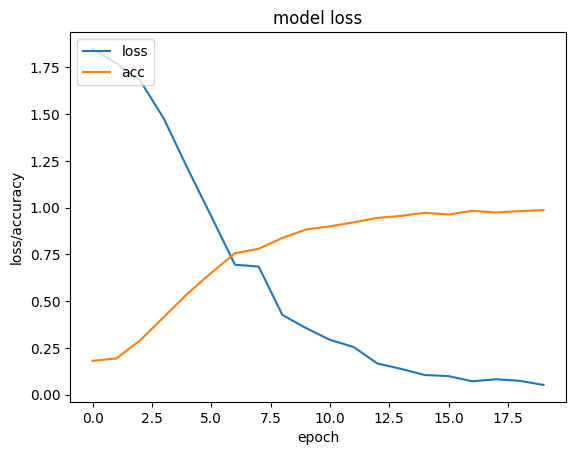

In [3]:
import os
from keras.models import load_model
import cv2
import numpy as np
from keras.layers import Input, Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

def LoadCitraTraining(sDir,LabelKelas):
  JumlahKelas=len(LabelKelas)
  TargetKelas = np.eye(JumlahKelas)
# Menyiapkan variabel list untuk data menampung citra dan data target
  X=[]#Menampung Data Citra
  T=[]#Menampung Target
  for i in range(len(LabelKelas)):
    #Membaca file citra di setiap direktori data set
    DirKelas = os.path.join(sDir, LabelKelas[i])
    files = os.listdir(DirKelas)

    for f in files:
      ff=f.lower()
      print(f)
      #memilih citra dengan extensi jpg,jpeg,dan png
      if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
         NmFile = os.path.join(DirKelas,f)
         #membaca citra berwarna sebagai data bertipe double
         img= np.double(cv2.imread(NmFile,1))
         img=cv2.resize(img,(128,128));
         #Normalisasi data citra menjadi sehingga maksimum menjadi 1
         img= np.asarray(img)/255;
         img=img.astype('float32')
         #Menambahkan citra dan target ke daftar
         X.append(img)
         T.append(TargetKelas[i])
     #--------akhir loop :Pfor f in files-----------------
  #-----akhir  loop :for i in range(len(LabelKelas))----

  #Mengubah List Menjadi numppy array
  X=np.array(X)
  T=np.array(T)
  X=X.astype('float32')
  T=T.astype('float32')
  return X,T

def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100,activation='relu')(x)
    x = Dense(100,activation='relu')(x)
    x=Dense(JumlahKelas,activation='softmax')(x)
    ModelCNN = Model(input_img, x)
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #ModelCNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

def TrainingCNN(JumlahEpoh,DirektoriDataSet,LabelKelas,NamaFileBobot ='weight.h5' ):
    #Membaca Data training dan label Kelas
    X,D=LoadCitraTraining(DirektoriDataSet,LabelKelas)
    JumlahKelas = len(LabelKelas)
    #Membuat Model CNN
    ModelCNN =ModelDeepLearningCNN(JumlahKelas)
    #Trainng
    history=ModelCNN.fit(X, D,epochs=JumlahEpoh,shuffle=True)
    #Menyimpan hasil learning
    ModelCNN.save(NamaFileBobot)
    #Mengembalikan output
    return ModelCNN,history


##########################################################
def Klasifikasi(DirDataSet,DirKlasifikasi,LabelKelas,ModelCNN=[]):
#Apabila parameter input ModelCNN tidak di isi maka
#   akan menggunakan bobot pada file 'weight.h5
  if not(ModelCNN):
      ModelCNN = load_model('weight.h5')

#Menyiapkan Data input Yang akan di kasifikasikan
  X=[]
  ls = [];
  DirKelas = DirDataSet+"\\"+DirKlasifikasi
  print(DirKelas)
  files = os.listdir(DirKelas)
  n=0;
  for f in files:
      ff=f.lower()
      print(f)
      if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
         ls.append(ff)
         NmFile = os.path.join(DirKelas,f)
         img= cv2.imread(NmFile,1)
         img=cv2.resize(img,(128,128))
         img= np.asarray(img)/255
         img=img.astype('float32')
         X.append(img)
     #----Akhir if-------------
  #---Akhir For
  X=np.array(X)
  X=X.astype('float32')
  #Melakukan prediksi Klasifikasi
  hs=ModelCNN.predict(X)

  LKlasifikasi=[];
  LKelasCitra =[];
  n = X.shape[0]
  for i in range(n):
      v=hs[i,:]
      if v.max()>0.5:
          idx = np.max(np.where( v == v.max()))
          LKelasCitra.append(LabelKelas[idx])
      else:
          idx=-1
          LKelasCitra.append("-")
      #------akhir if
      LKlasifikasi.append(idx);
  #----akhir for
  LKlasifikasi = np.array(LKlasifikasi)
  return ls, hs, LKelasCitra

#****************
#  Program Utama
#****************

###############################################
#  1, Training CNN
#----------------------------------------------
#a. Menentukan Direktori Yang menyimpan Data set
DirektoriDataSet="/content/Chessman-image-dataset/Chess"
#   Data Set disimpan dalam direktori yang sama dengan nama kelas

#b. Label Data Set
LabelKelas=("Bishop", "King", "Knight", "Pawn", "Queen", "Rook")

#c. Inisialisasi parameter Training
JumlahEpoch = 20;
FileBobot = "WRambu.h5"
#d. training
ModelCNN,history = TrainingCNN(JumlahEpoch,DirektoriDataSet,LabelKelas ,FileBobot)
ModelCNN.summary()

#c. Menampilkan Grafik Loss dan accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title('model loss')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()


Kelas: Bishop


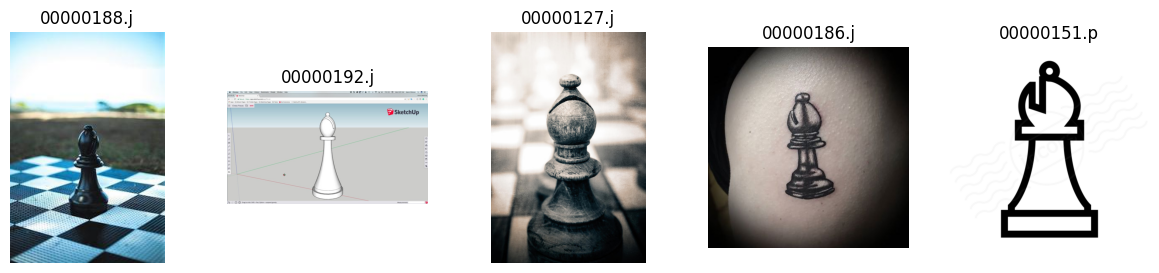


Kelas: King


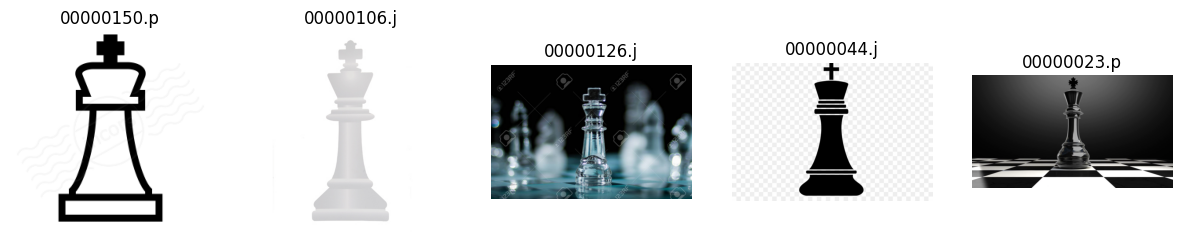


Kelas: Knight


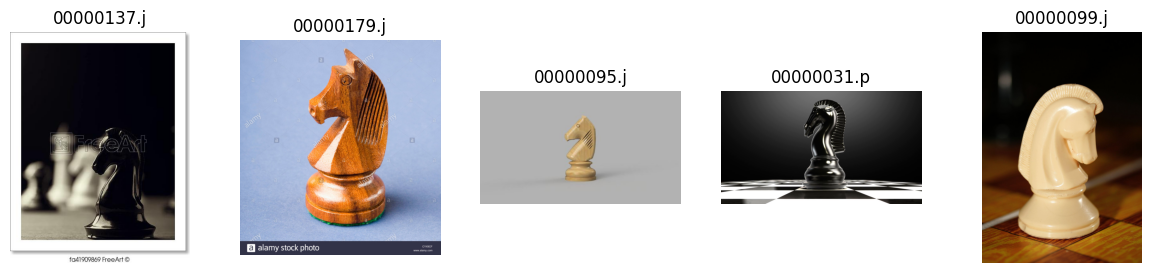


Kelas: Pawn


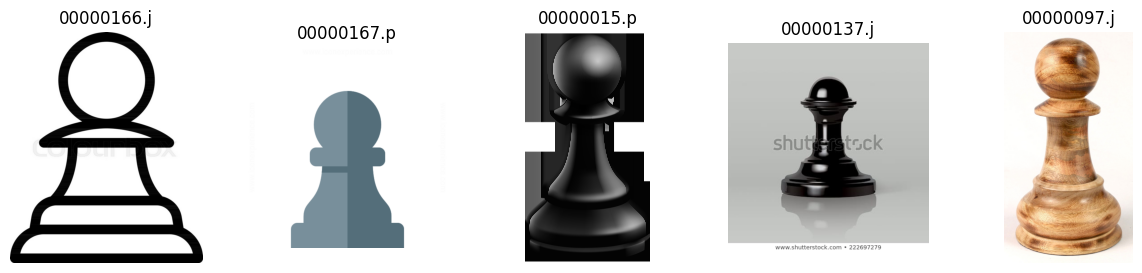


Kelas: Queen


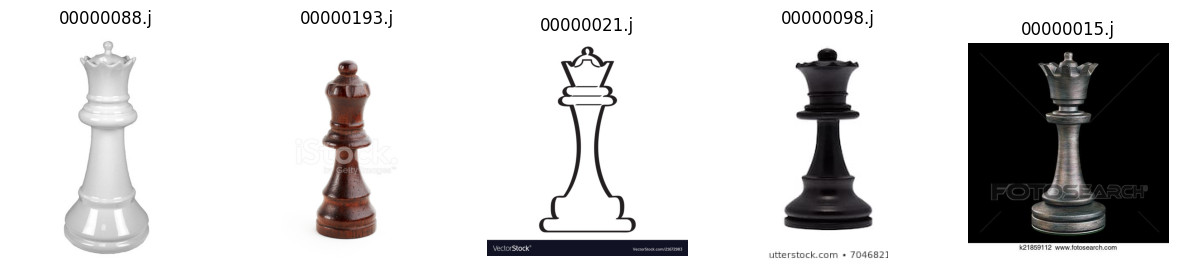


Kelas: Rook


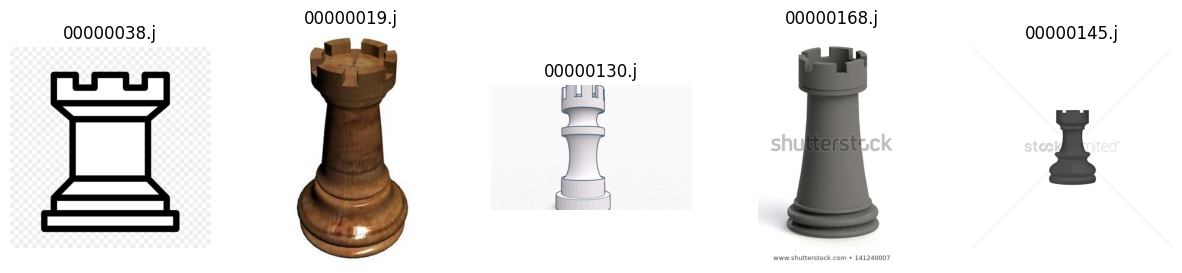

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path ke dataset
base_dir = "/content/Chessman-image-dataset/Chess"
label_kelas = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

# Menampilkan 5 gambar dari setiap kelas
for kelas in label_kelas:
    folder_path = os.path.join(base_dir, kelas)
    all_images = os.listdir(folder_path)
    sample_images = random.sample(all_images, 5)  # ambil 5 gambar acak

    print(f"\nKelas: {kelas}")
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(img_name[:10])
        plt.axis('off')
    plt.show()

In [10]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model CNN kamu (pastikan file model sudah diupload)
# Ganti 'nama_model.h5' dengan nama file model warna kamu
ModelCNN = load_model('WRambu.h5')

# Label kelas sesuai urutan output model
LabelKelas = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

# Upload gambar
uploaded = files.upload()

for fn in uploaded.keys():
    # Load dan tampilkan gambar
    path = fn
    img = image.load_img(path, target_size=(128, 128))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Pra-pemrosesan gambar
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi

    # Prediksi
    classes = ModelCNN.predict(x)
    pred_idx = np.argmax(classes[0])         # Ambil indeks dengan nilai tertinggi
    pred_label = LabelKelas[pred_idx]        # Konversi ke nama warna
    confidence = np.max(classes[0]) * 100    # Persentase confidence

    # Output hasil
    print(f"{fn} => Bidak terprediksi: {pred_label} ({confidence:.2f}%)")

In [11]:
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 6.0 MB/s eta 0:00:00


In [12]:
import anvil.server

In [13]:
anvil.server.connect("server_GMD7IDFZMA37BW32TJJADPPK-EA4XA3PZ3ODAATPE")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [14]:
import anvil.server
import anvil.media
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

ModelCNN = load_model('WRambu.h5')

# Label kelas sesuai urutan output model
LabelKelas = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f, target_size=(128, 128))  # Sesuaikan jika model pakai ukuran lain
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        prediction = ModelCNN.predict(img_array)
        pred_index = np.argmax(prediction[0])
        pred_label = LabelKelas[pred_index]

        return pred_label

In [15]:
anvil.server.wait_forever()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


KeyboardInterrupt: 